# Feb 25, 2020

In [1]:
# import the necessary packages
from os import listdir
from os.path import isfile , join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import ndimage, signal
from skimage import filters
from numpy.fft import fft, ifft

In [2]:
def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

In [3]:
def multi_view( images ):
    images_count = len( images ) #count of images (list type)
    fig = plt.figure(figsize=(10,20))
    for row in range( images_count  ):
        ax1 = fig.add_subplot( images_count , 1 , row + 1)
        #ax1.imshow( images[ row ] )
        ax1.imshow(images[ row ], cmap=plt.get_cmap('gray')) # default is viridis 

In [4]:
def histogram(gr_image):
    bins=np.unique(gr_image) #levels
    hist=np.zeros(bins.shape)
    
    #for level in hist: #??
        #print(level)
    for level in range(len(hist)): 
        #print(bins[level])
        hist[level]=np.sum(gr_image==bins[level])
        
    #plt.stem(bins, hist, use_line_collection=True,basefmt=None)
    return bins, hist

In [5]:
def histEq(gr_image):
    bins, imhist=histogram(gr_image) #histogram
    equalized_im=np.zeros(gr_image.shape)
    imhistNormalized=imhist/(len(gr_image)*len(gr_image[0])) #normalized histogram
    cumulativeHist=np.cumsum(imhistNormalized) #cumulative sum of normalized histogram
    for Original_level in range(len(imhist)):
        #print(cumulativeHist[Original_level])
        #print(bins[Original_level])
        equalized_im[gr_image==bins[Original_level]]=cumulativeHist[Original_level]
        
    binsEq, histEq=histogram(equalized_im)
    plt.stem(bins, imhist, use_line_collection=True,basefmt=None)
    #plt.stem(cumulativeHist,use_line_collection=True,basefmt=None)
    #plt.stem(binsEq,histEq,use_line_collection=True,basefmt=None)
    #plt.imshow(equalized_im,cmap='gray')
    return cumulativeHist

array([0.00406667, 0.00537778, 0.00673333, ..., 0.99997778, 0.99998889,
       1.        ])

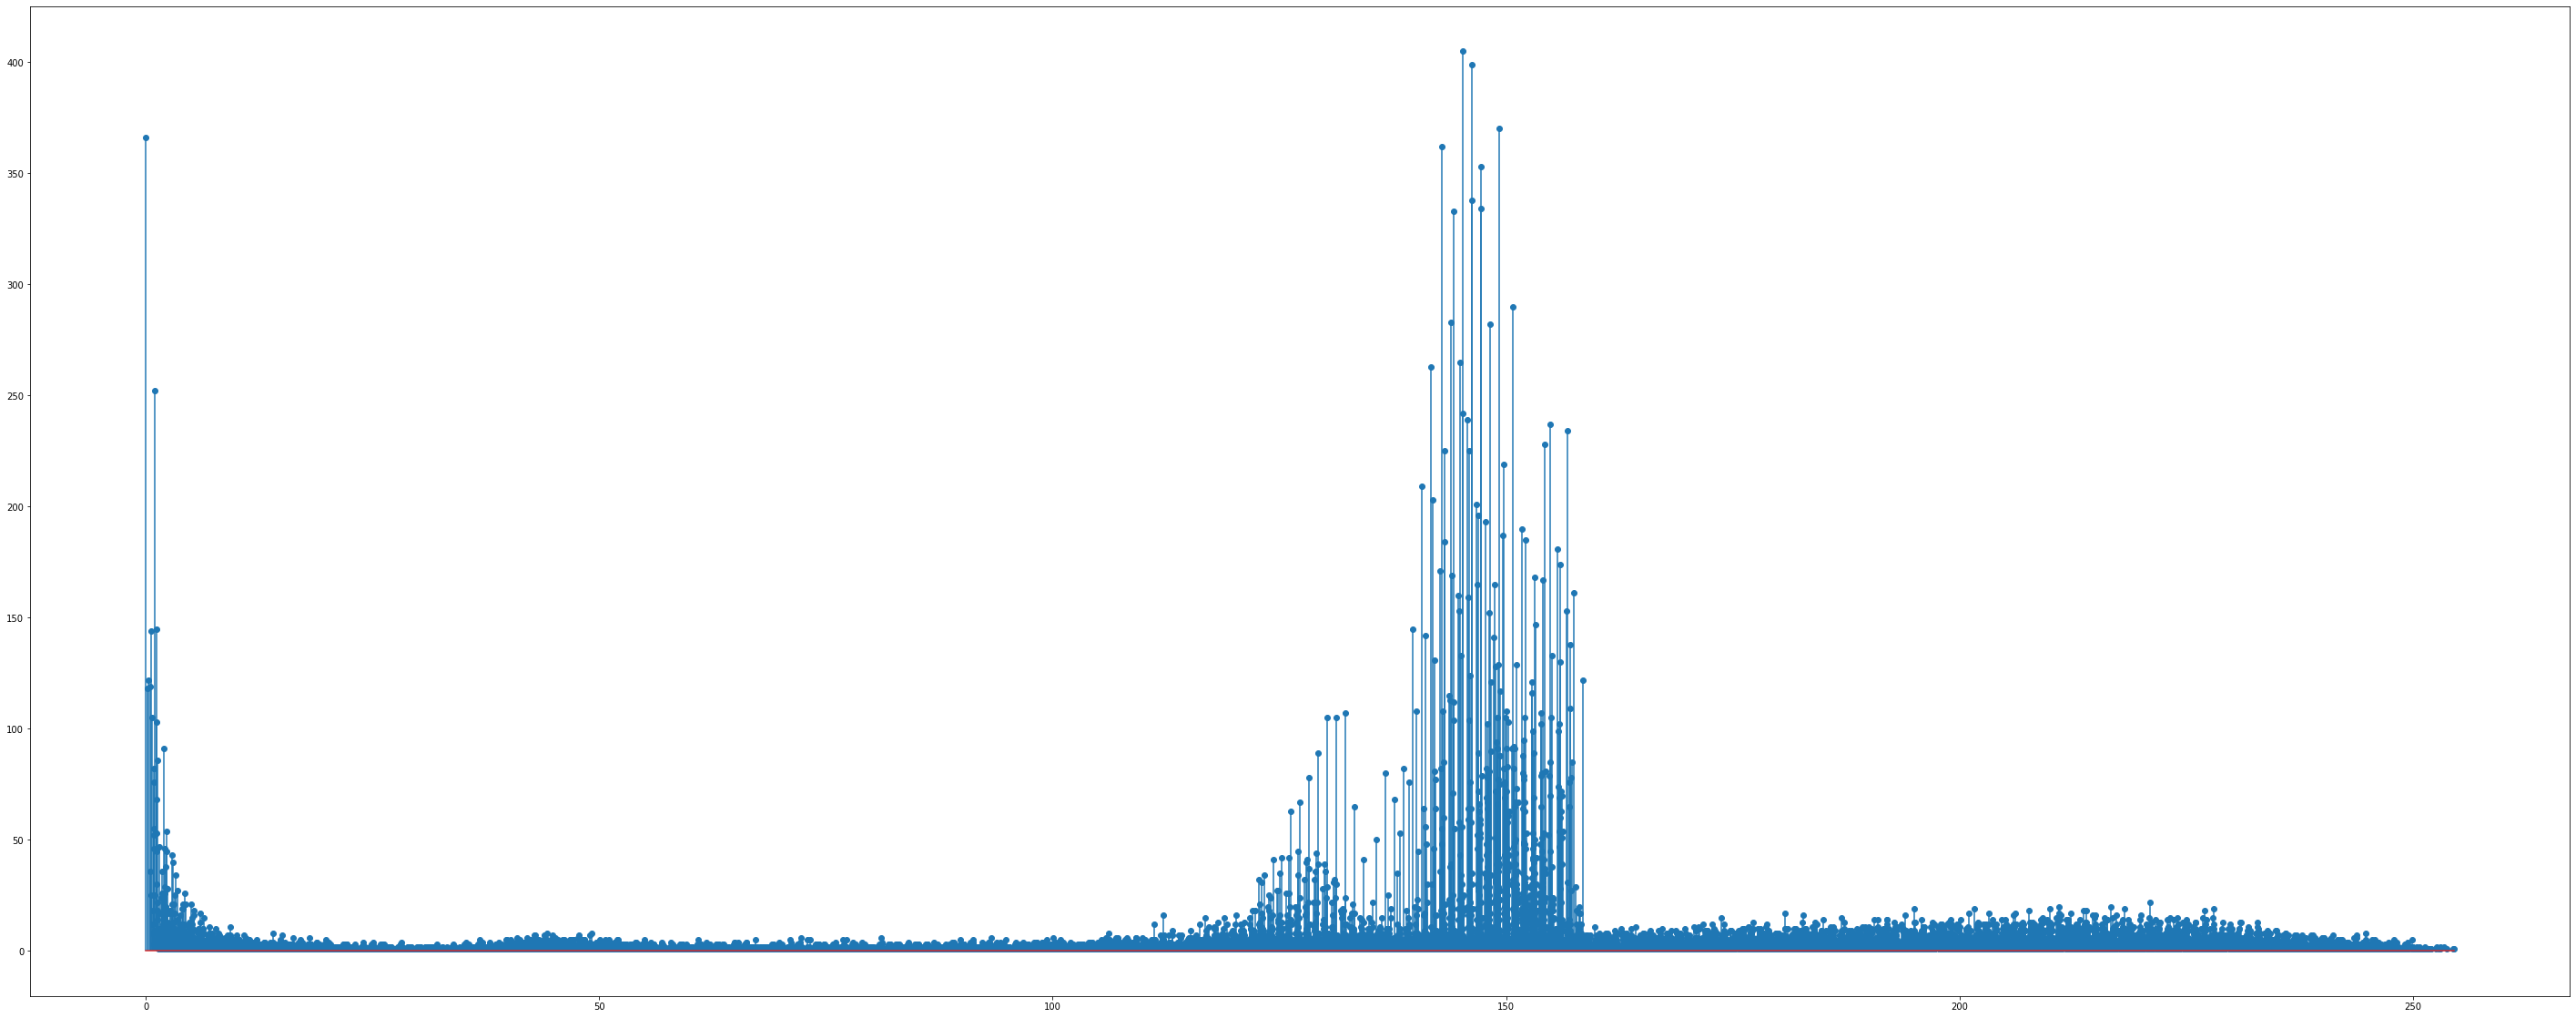

In [6]:
images_files = [ join("./images" , f) for f in listdir("images") if isfile(join("images" , f)) ]
#print(images_files)
#print(listdir("images"))
images = [ mpimg.imread( f ) for f in images_files ]
gray_images = [ rgb2gray( img ) for img in images ]
#gray_bins = [ histogram( img ) for img in gray_images ]
fig = plt.figure(figsize=(50,20))
#gray_bins = [ histogram( gray_images[6] )] #3, 4, 5
histEq(gray_images[6])
#plt.imshow(gray_images[6])
#print(len(result))
#print(len(result[0][0]))

[None, None, None, None, None, None, None]

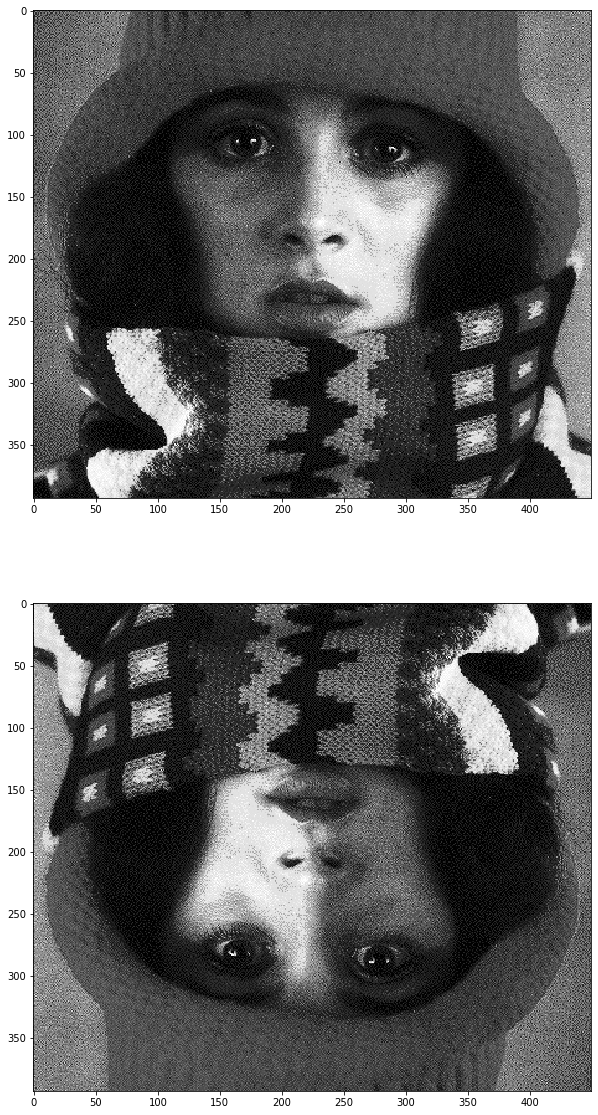

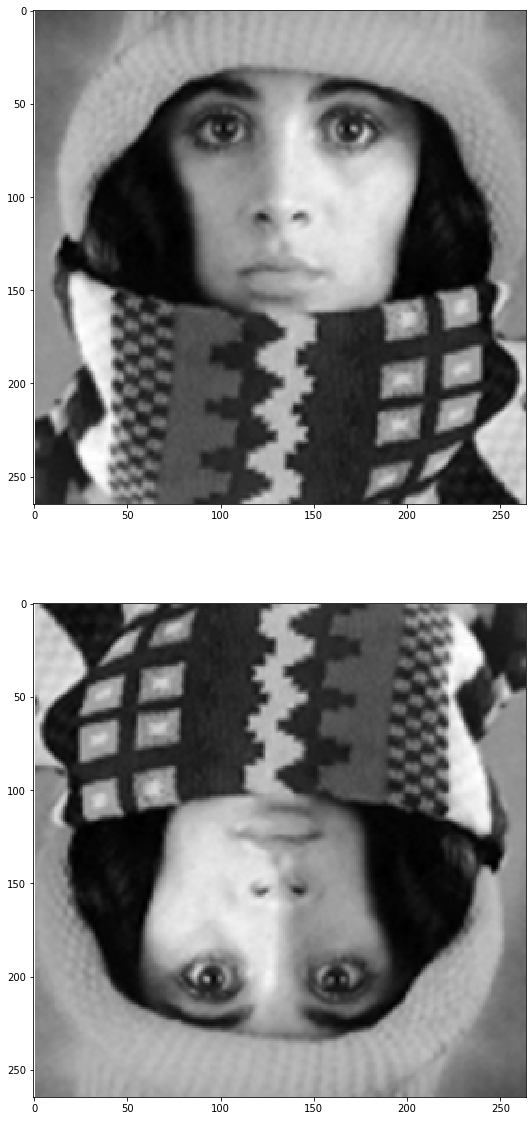

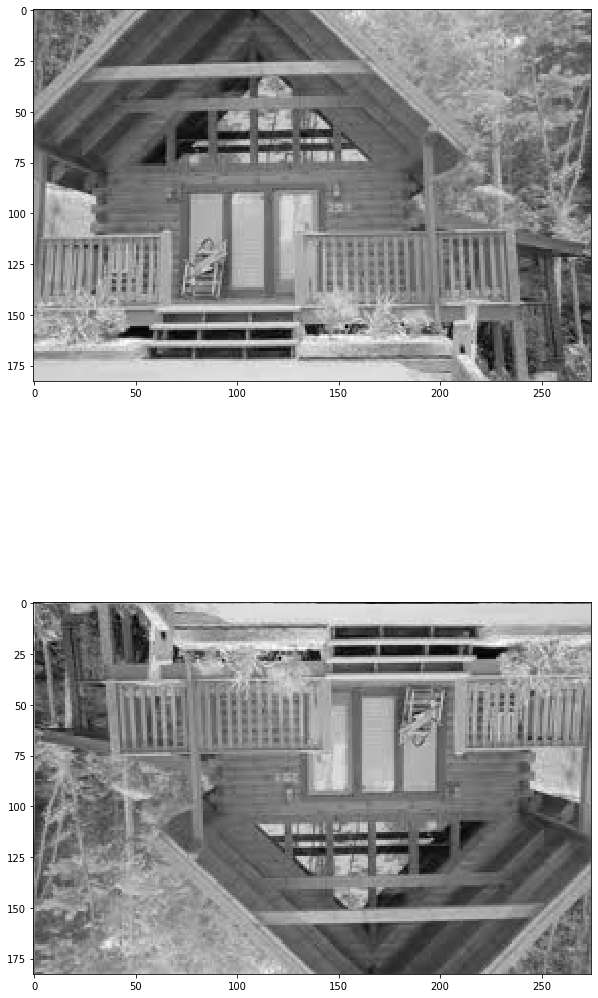

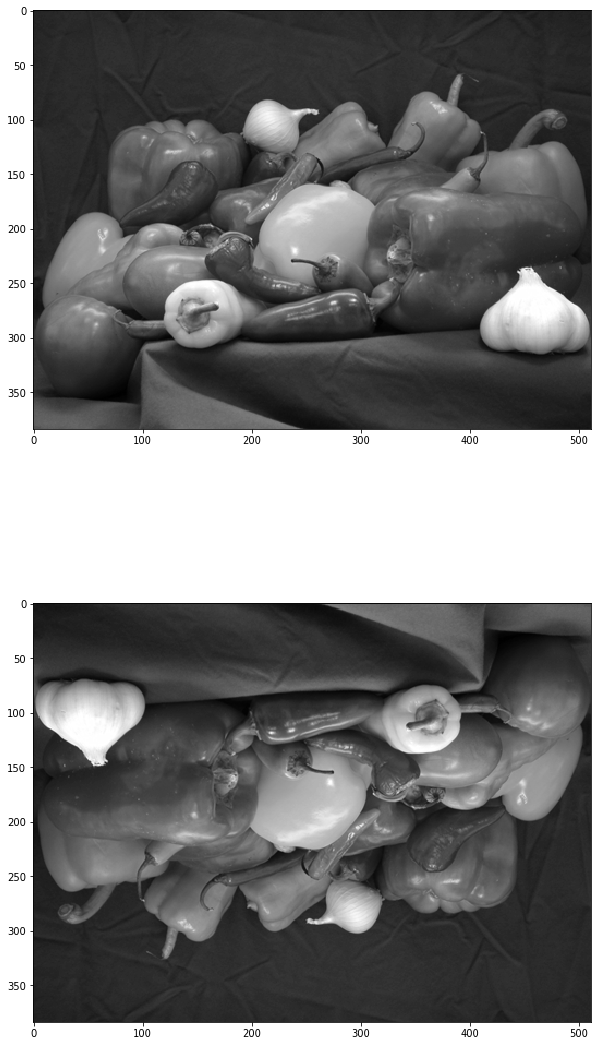

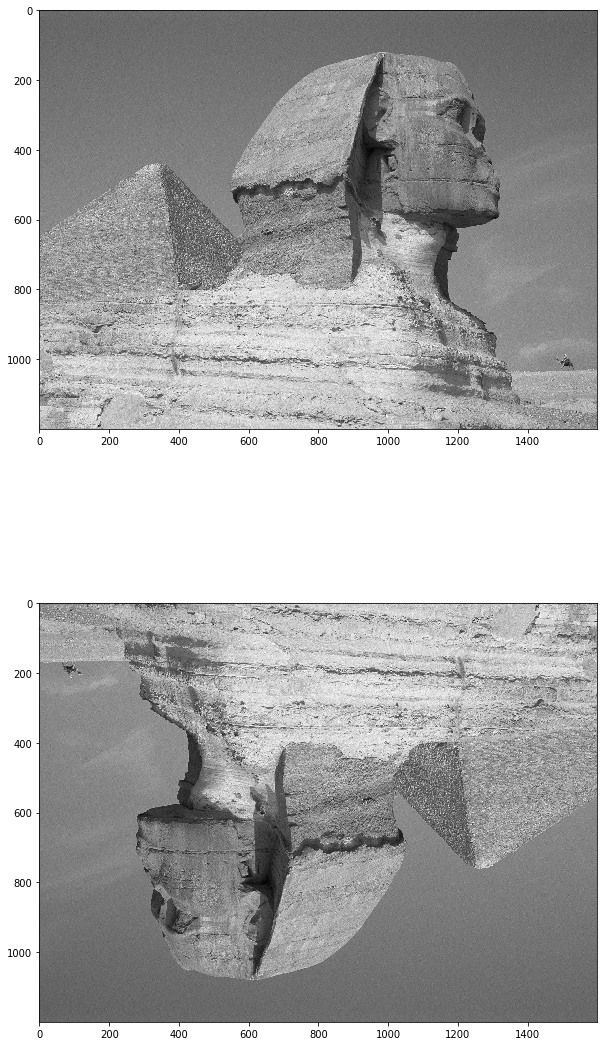

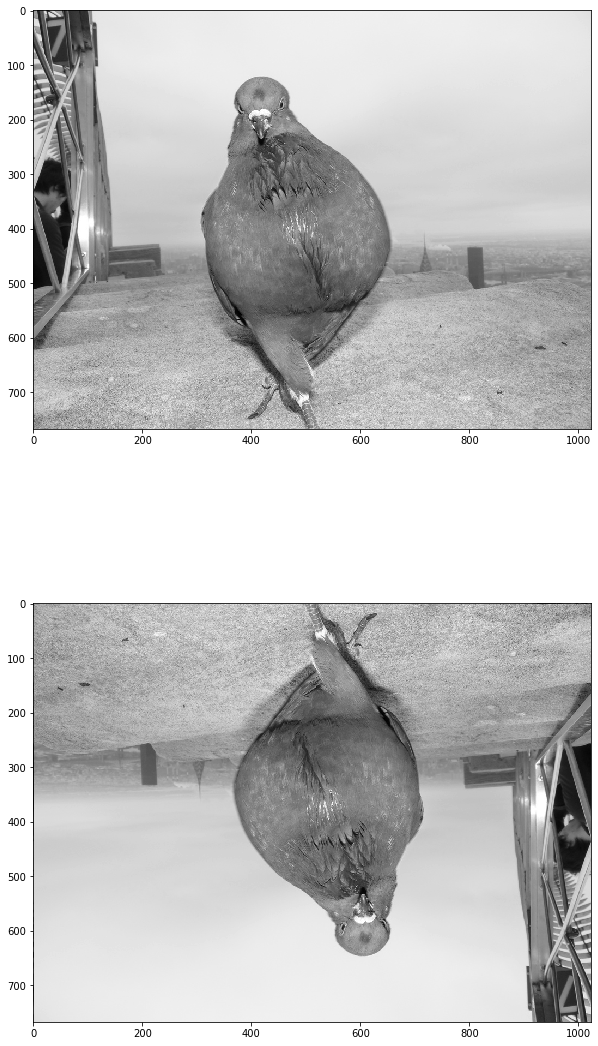

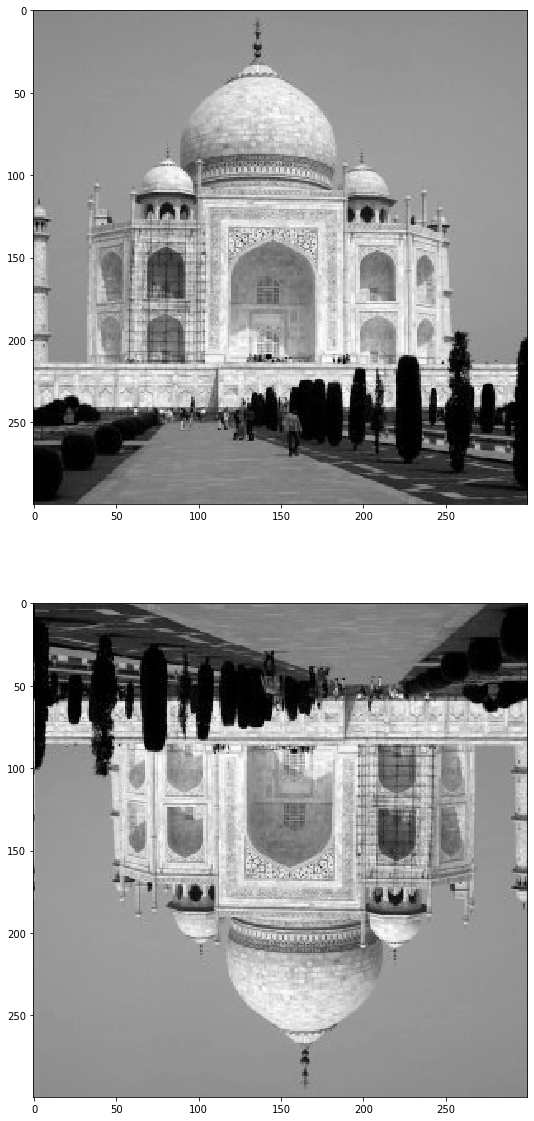

In [7]:
dft_images=[np.fft.fft2(img) for img in gray_images] #2D fft
dft_images_shifted=[np.fft.fft2(img) for img in dft_images] # shifted 2D fft

#magnitude_spectrum = [np.log(np.abs(fshift+1)) for fshift in dft_images_shifted]
dft_Mag= [np.sqrt(img.real**2 + img.imag**2) for img in dft_images_shifted]
#dft_Phase= [np.arctan(img.imag/img.real) for img in magnitude_spectrum]
magnitude_spectrum = [np.log(np.abs(fshift+1)) for fshift in dft_Mag]

combinations=list(zip(gray_images,dft_Mag))
[multi_view(setImg) for setImg in combinations]
